# PRIMERA PRUEBA DISTANCIAS DE LA CLASE

In [9]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from PIL import Image

images=[]
A = ["../datasets/faces94/female/*"]
A += ["../datasets/faces94/male/*"]
A += ["../datasets/faces94/malestaff/*"]

for i in range(3):
    for root in glob.glob(A[i]):
        raiz=root+"/*.jpg"#deberia ser solo '/*.jpg' pero existen otros formatos y omite varias
        for root1 in glob.glob(raiz):
            images.append(root1)

print(len(images))

img=np.zeros((len(images),200,180))
print(img.shape)
for i in range(len(images)):
    img[i,:,:]= cv2.cvtColor(cv2.resize(cv2.imread(images[i]),(180,200)),cv2.COLOR_BGR2GRAY)
print(len(img))
print(img.shape)



3059
(3059, 200, 180)
3059
(3059, 200, 180)


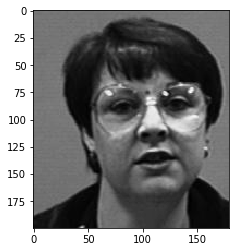

In [10]:
#para seleccionar una foto cualquiera
plt.imshow(img[10], cmap='gray')
plt.show()

# MEDIANA

(200, 180)


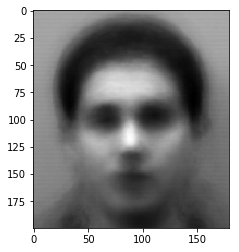

In [11]:
#mediana
median_face = np.median(img, axis=0)
plt.imshow(median_face, cmap=plt.cm.gray) 
print(median_face.shape)

(3059,)


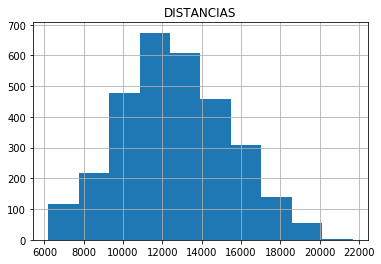

[1559]
[ 119 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569 1570 1571
 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583 1584 1585
 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597 1598]


<Figure size 432x288 with 0 Axes>

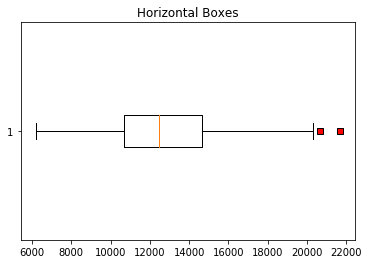

In [17]:
# norma 2 - euclidiana
#contra la mediana
Distancia=np.linalg.norm(median_face - img, ord=np.inf, axis=(1,2), keepdims=False) # 1 npinf
print(Distancia.shape)
plt.title('DISTANCIAS')
plt.hist(Distancia)
plt.grid(True)
plt.show()
plt.clf()

red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Horizontal Boxes')
ax5.boxplot(Distancia, vert=False, flierprops=red_square)

z = np.abs(stats.zscore(Distancia))

out=np.where(z > 2.5)
[outliers]=out
maxm=np.max(Distancia)
may=np.where(Distancia==maxm)
[mayor]=may
print(mayor)
print(outliers)

21679.0
[1559]


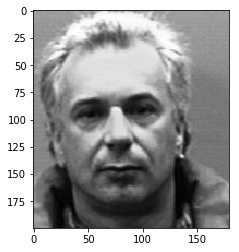

In [18]:
# outlier maximo
print(maxm)
print(mayor)
j=mayor[0]
plt.imshow(img[j], cmap=plt.cm.gray)

(41,)


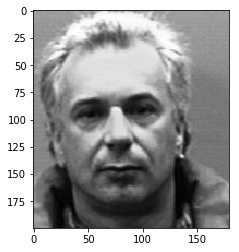

In [19]:
# outliers
print(outliers.shape)
j=outliers[1]
plt.imshow(img[j], cmap=plt.cm.gray)

(200, 180)
(200, 180)
22908.0
21679.0


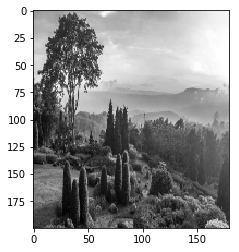

In [20]:
#foto externa

image2="1.jpg"
img2= cv2.cvtColor(cv2.resize(cv2.imread(image2),(180,200)),cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap=plt.cm.gray)
print(img2.shape)
print(median_face.shape)
Distancia2=np.linalg.norm(median_face - img2, ord=np.inf, axis=(0,1), keepdims=False)
print(Distancia2)
print(maxm)

# MEDIA

(200, 180)


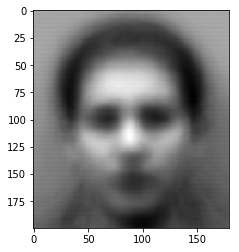

In [22]:
#media
mean_face = np.mean(img, axis=0)
plt.imshow(mean_face, cmap=plt.cm.gray) 
print(mean_face.shape)

(3059,)


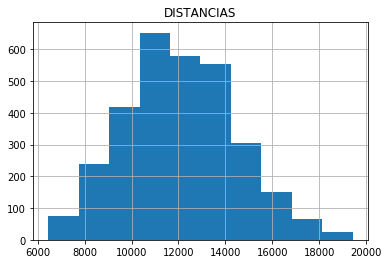

[1559]
[ 119 1559 1570 1572 2399 2400 2401 2402 2403 2404 2405 2406 2407 2408
 2409 2410 2411 2412 2413 2414 2415 2416 2417 2418]


<Figure size 432x288 with 0 Axes>

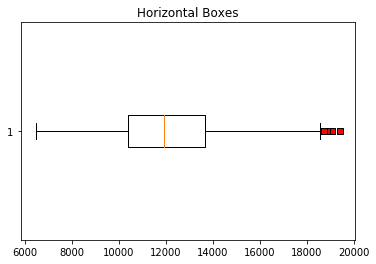

In [23]:
# norma 2 - euclidiana
#contra la media
Distancia=np.linalg.norm(mean_face - img, ord=np.inf, axis=(1,2), keepdims=False) # 1 npinf
print(Distancia.shape)
plt.title('DISTANCIAS')
plt.hist(Distancia)
plt.grid(True)
plt.show()
plt.clf()

red_square = dict(markerfacecolor='r', marker='s')
fig5, ax5 = plt.subplots()
ax5.set_title('Horizontal Boxes')
ax5.boxplot(Distancia, vert=False, flierprops=red_square)

z = np.abs(stats.zscore(Distancia))

out=np.where(z > 2.5)
[outliers]=out
maxm=np.max(Distancia)
may=np.where(Distancia==maxm)
[mayor]=may
print(mayor)
print(outliers)

19428.1781627983
[1559]


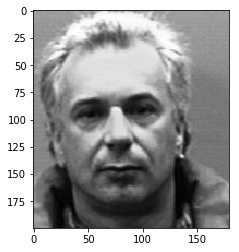

In [24]:
# outlier maximo
print(maxm)
print(mayor)
j=mayor[0]
plt.imshow(img[j], cmap=plt.cm.gray)

(24,)


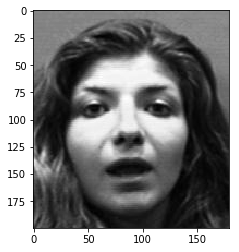

In [25]:
# outliers
print(outliers.shape)
j=outliers[0]
plt.imshow(img[j], cmap=plt.cm.gray)

(200, 180)
(200, 180)
20691.88558352403
19428.1781627983


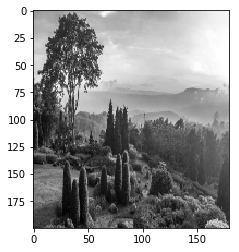

In [26]:
#foto externa

image2="1.jpg"
img2= cv2.cvtColor(cv2.resize(cv2.imread(image2),(180,200)),cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap=plt.cm.gray)
print(img2.shape)
print(mean_face.shape)
Distancia2=np.linalg.norm(mean_face - img2, ord=np.inf, axis=(0,1), keepdims=False)
print(Distancia2)
print(maxm)